In [25]:
import os.path

from clustering.add_class_to_data import CLUSTERS_HEADERS_ADDED, N_CLUSTERS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from preprocessing.config import CYNGNSS_FEATURES_HEADER

In [27]:
# Boxplot
def get_features(dataset_path):
    data = np.load(dataset_path)
    features = np.concat([data[:, :data.shape[1] - (17 * 11) - len(N_CLUSTERS)], data[:, -len(N_CLUSTERS):]], axis=1)
    return features

columns = (CYNGNSS_FEATURES_HEADER + CLUSTERS_HEADERS_ADDED).split(',')
# 1st and 15th of each Month considered
features = np.concat([get_features(path) for path in [f'../data/train_label_with_cluster/2022{i:02d}{j}.npy' for i in range(1, 13) for j in ['01','15'] if os.path.exists(f'../data/train_label_with_cluster/2022{i:02d}{j}.npy')]], axis=0)
df = pd.DataFrame(features, columns=columns[:len(columns) - (17 * 11) - len(N_CLUSTERS)] + columns[-len(N_CLUSTERS):])


for column in columns[-len(N_CLUSTERS):]:
    plt.figure()
    df.boxplot([column])
    plt.savefig(f'../figures/cluster_features/boxblot_features/{column}.png')
    plt.close()


In [28]:
# correlation matrix
corr = df.drop(['timestamp_lst', 'rounded_timestamps'], axis=1).corr()
cmap = sns.diverging_palette(250, 5, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlation Matrix")\
    .set_table_styles(magnify()).to_html('../figures/cluster_features/corr_matrix.html')

np.abs(corr).style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlation Matrix")\
    .set_table_styles(magnify()).to_html('../figures/cluster_features/abs_corr_matrix.html')

<Figure size 640x480 with 0 Axes>

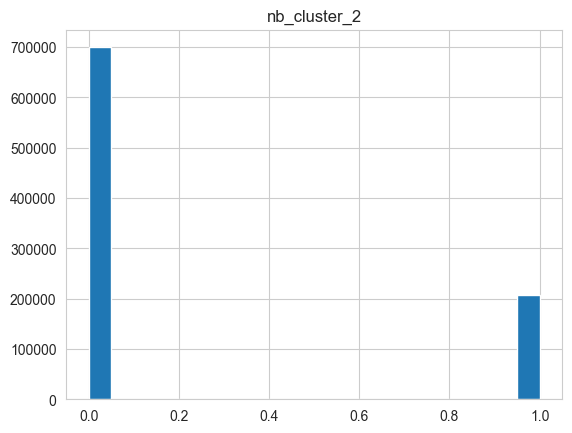

<Figure size 640x480 with 0 Axes>

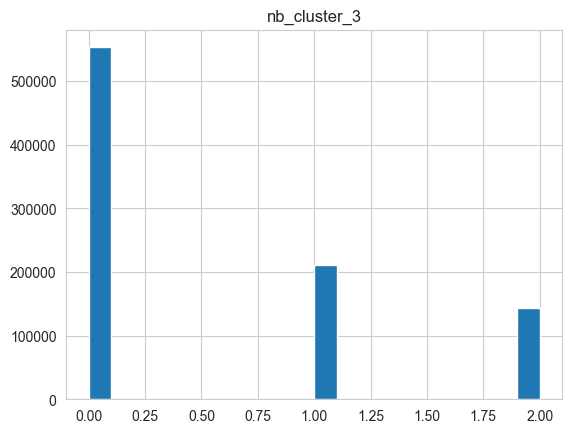

<Figure size 640x480 with 0 Axes>

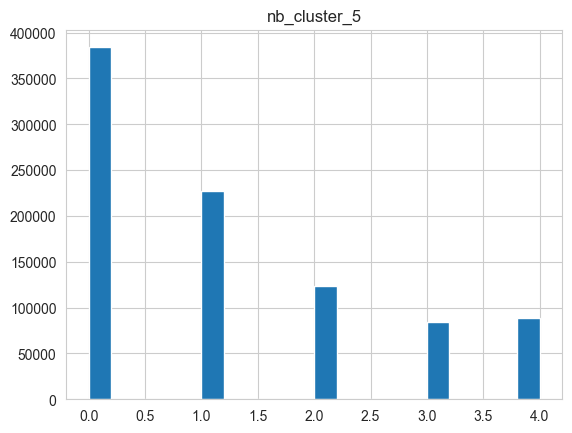

<Figure size 640x480 with 0 Axes>

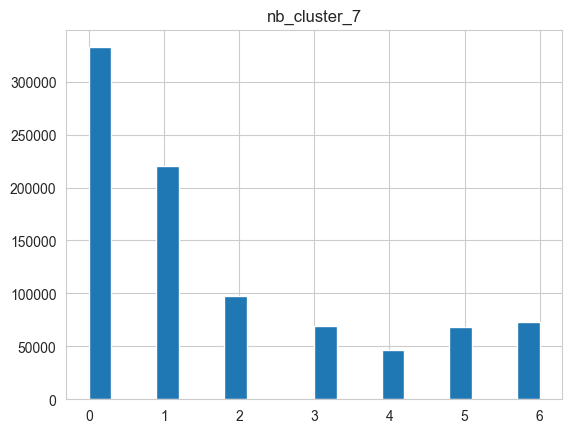

<Figure size 640x480 with 0 Axes>

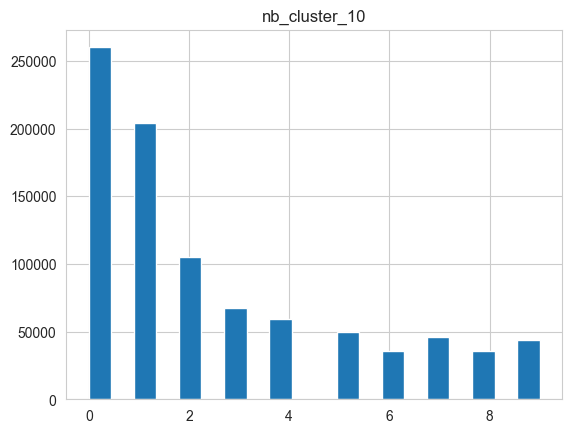

<Figure size 640x480 with 0 Axes>

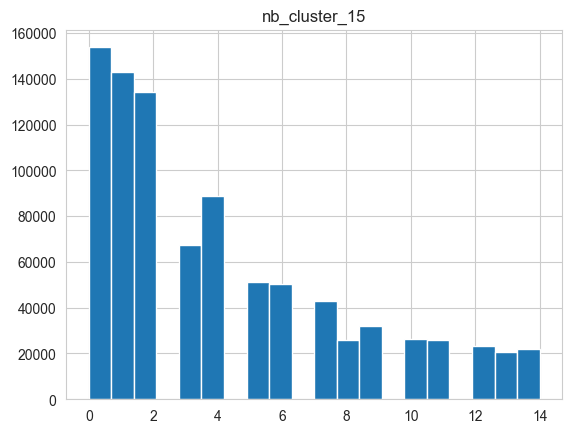

<Figure size 640x480 with 0 Axes>

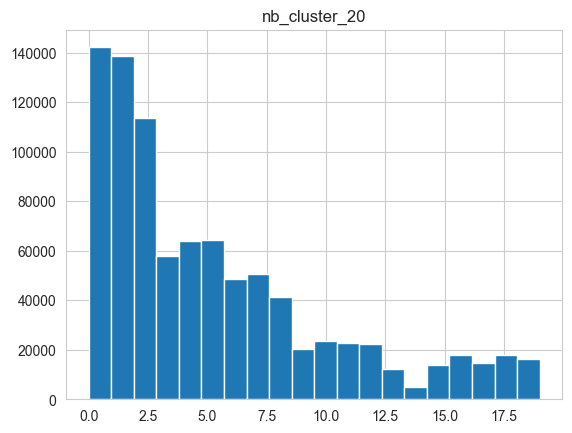

In [30]:
# cluster hist

for column in CLUSTERS_HEADERS_ADDED.split(','):
    if column == '':
        continue
    plt.figure()
    df.hist(column, bins=20)
    plt.savefig(f'../figures/cluster_features/hist/{column}.png')

In [32]:
# Kepler plot
df.filter(CLUSTERS_HEADERS_ADDED.split(',') + ['sp_lat', 'sp_lon']).to_csv('../figures/cluster_features/cluster_kepler.csv', index=False)

In [ ]:
|